# Project: Wrangling and Analyze Data

## Data Gathering
### In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

### 1.Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

#### Importing the libraries

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the twitter_archive_enhanced.csv

In [256]:
archiveEnhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

#### ---We first import the requests library

In [257]:
import requests as req

In [258]:
with req.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")as rq:
    with open("image-predictions-tsv", "wb") as file:
        file.write(rq.content)

In [259]:
# Reading the image-predictions-tsv created.

imagePredictions_df = pd.read_csv("image-predictions-tsv", sep = "\t")

## Using the jason-txt provided since using tweepy to get additional data failed.

In [260]:
import json

In [261]:
# Opening the file

my_list = []
with open('tweet-json.txt') as file:
    for line in file:
        my_list.append(json.loads(line))

In [262]:
# Getting the favorite_count and retweet_count and saving the dataframe

additionalTweets_df = pd.DataFrame(my_list, columns=['id', 'retweet_count', 'favorite_count'])

### additionalTweets_df provides the missing values : retweeet_count and favorite_count

## Assessing Data

#### In this section, detect and document at least eight (8) quality issues and two (2) tidiness issue. You must use both visual assessment programmatic assessement to assess the data.

#### Note: pay attention to the following key points when you access the data.
#### 1.You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets
#### 2.Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
#### 3. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
#### 4. You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## 1. Assessing archiveEnhanced_df

### Visual Assment
- I opened the datasets in Microsoft Excel and detected a few quality issues like missing values.

### Programmatic Assment

In [263]:
archiveEnhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [264]:
archiveEnhanced_df.shape

(2356, 17)

In [265]:
archiveEnhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [266]:
# checking the timestamp datatype
archiveEnhanced_df['timestamp'].dtypes

dtype('O')

##### -dtype('O') means that it is a pandas string. Timestamps should be in the date datatype.

In [267]:
#checking for duplicates

archiveEnhanced_df.duplicated().any()

False

In [268]:
archiveEnhanced_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [269]:
archiveEnhanced_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [270]:
archiveEnhanced_df['name'].value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Lucy          11 
              .. 
Dex           1  
Ace           1  
Tayzie        1  
Grizzie       1  
Christoper    1  
Name: name, Length: 957, dtype: int64

In [271]:
archiveEnhanced_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [272]:
pd.set_option('display.max_colwidth', None)

archiveEnhanced_df.expanded_urls.sample(20)

2162                                                                                                                                    https://twitter.com/dog_rates/status/669393256313184256/photo/1
613                                                                                                                                     https://twitter.com/dog_rates/status/796865951799083009/photo/1
995                                                                                                                                     https://twitter.com/dog_rates/status/748346686624440324/photo/1
1405                                                                                                                                    https://twitter.com/dog_rates/status/699323444782047232/photo/1
1981                                                                                                                                    https://twitter.com/dog_rates/status/672970152493887488/photo/1


## 2. Assessing imagePredictions_df

In [273]:
imagePredictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [274]:
imagePredictions_df.shape

(2075, 12)

In [275]:
imagePredictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [276]:
imagePredictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [277]:
imagePredictions_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### checking the datatypes

In [278]:
imagePredictions_df['img_num'].dtype

dtype('int64')

In [279]:
imagePredictions_df['p1'].dtype

dtype('O')

In [280]:
imagePredictions_df['p2'].dtype

dtype('O')

In [281]:
imagePredictions_df['p3'].dtype

dtype('O')

## 3. Assessing additionalTweets_df

In [282]:
additionalTweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [283]:
additionalTweets_df.shape

(2354, 3)

In [284]:
additionalTweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [285]:
additionalTweets_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [286]:
additionalTweets_df['id'].dtype

dtype('int64')

## Quality issues

### 1. archiveEnhanced_df

1. icorrect datatypes (in the tweet_id, timestamp columns.)
2. Inconsistent data. (there are rows with retweets and replies information yet we want only the original tweets.)
3. Non-descriptive column header in the timestamp column. It should be changed to a more descriptive header like tweet_Date.
4. Extract the actual source from the source column.
5. Some rating_denominators are not equal to 10.
6. Remove the repeated_urls.
7. Inconstinstency in the name column.
#### imagePredictions_df
7. Non-descriptive column headers in p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog 
8. incorrect datatype in tweet_id 

#### additionalTweets_df
9. id should be tweet_id to make it uniform
10. tweet_id should have string datatype


## Tidiness issues

1. Dropping columns with so many missing values.
2. One variable has been split into 4 columns(doggo, floofer,puppo, pupper).These columns should be merged to a single column named dog_stage
3. 3 datasets have information of the same thing(dogs). The 3 datasets should be merged.
4. Derive ratings column based on the rating_numerator and drating_denominator


# Cleaning Data

#### In this section, clean **all** of the issues you documented while assessing.

#### **Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [323]:
# Make copies of original pieces of data
archiveEnhanced_df_clean = archiveEnhanced_df.copy()
imagePredictions_df_clean = imagePredictions_df.copy()
additionalTweets_df_clean = additionalTweets_df.copy()

#### # Define:

icorrect datatypes (in the tweet_id, timestamp columns.)

#### Code

In [288]:
archiveEnhanced_df_clean['tweet_id'] = archiveEnhanced_df_clean['tweet_id'].astype(str)
imagePredictions_df_clean['tweet_id'] = imagePredictions_df_clean['tweet_id'].astype(str)
archiveEnhanced_df['timestamp'] = pd.to_datetime(archiveEnhanced_df['timestamp'])

#### Test

In [289]:
print(archiveEnhanced_df_clean['tweet_id'].dtype)
print(imagePredictions_df_clean['tweet_id'].dtype)
print(archiveEnhanced_df['timestamp'].dtype)

object
object
datetime64[ns, UTC]


##   Define:
 Inconsistent data. (there are rows with retweets and replies information yet we want only the original tweets.)

#### Code

In [290]:

retweets_or_replies = archiveEnhanced_df_clean[(archiveEnhanced_df_clean['in_reply_to_user_id'].notnull()) | 
          (archiveEnhanced_df_clean['retweeted_status_id'].notnull())] 

retweets_or_replies 
archiveEnhanced_df_clean.drop(retweets_or_replies.index, axis=0, inplace =True)

#### Test

In [291]:
archiveEnhanced_df_clean[(archiveEnhanced_df_clean['in_reply_to_user_id'].notnull()) | 
          (archiveEnhanced_df_clean['retweeted_status_id'].notnull())] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define:
Non-descriptive column header in the timestamp column. It should be changed to a more descriptive header like tweet_Date.

#### Code

In [292]:
archiveEnhanced_df_clean = archiveEnhanced_df_clean.rename(columns = {'timestamp': 'tweet_date'})

#### Test

In [293]:
archiveEnhanced_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'tweet_date', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

####  #3. Define:
Non-descriptive column headers in p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog

#### Code



In [294]:

imagePredictions_df_clean = imagePredictions_df_clean.rename(columns = {'p1' : 'prediction1',
                                          'p2' : 'prediction2',
                                          'p3' : 'prediction3',
                                          'p1_conf' : 'prediction1_confidence',
                                          'p2_conf' : 'prediction2_confidence',
                                          'p3_conf' : 'prediction3_confidence',
                                          'p1_dog' : 'prediction1_dog_breed_bool',
                                          'p2_dog' : 'prediction2_dog_breed_bool',
                                          'p3_dog' : 'prediction3_dog_breed_bool'})

#### Test

In [296]:
imagePredictions_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_dog_breed_bool', 'prediction2',
       'prediction2_confidence', 'prediction2_dog_breed_bool', 'prediction3',
       'prediction3_confidence', 'prediction3_dog_breed_bool'],
      dtype='object')

#### #4. Define:
The img_num and p1, p2, p3 column should be in categorical variables

#### Code

In [297]:
imagePredictions_df_clean['prediction1'] = imagePredictions_df_clean['prediction1'].astype('category')
imagePredictions_df_clean['prediction2'] = imagePredictions_df_clean['prediction2'].astype('category')
imagePredictions_df_clean['prediction3'] = imagePredictions_df_clean['prediction3'].astype('category')

#### Test

In [298]:
print(imagePredictions_df_clean['prediction1'].dtype)
print(imagePredictions_df_clean['prediction2'].dtype)
print(imagePredictions_df_clean['prediction3'].dtype)

category
category
category


####  #5. Define:
 Extract the actual source from the source column

#### Code

In [299]:
pd.set_option('display.max_colwidth', -1)
archiveEnhanced_df_clean.source

C:\Users\mwendwa\anaconda3\envs\Udacity_Projects\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [300]:
archiveEnhanced_df_clean.source = archiveEnhanced_df_clean.source.str.split('>', expand=True)[1].str.split('<', expand=True)[0]
archiveEnhanced_df_clean.source 

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2097, dtype: object

#### Test

In [301]:
archiveEnhanced_df_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

#### Define
Some rating_denominators are not equal to 10

#### Code

In [302]:
Denominator_Not10 = archiveEnhanced_df_clean.query('rating_denominator != 10').index

for index in Denominator_Not10:
    archiveEnhanced_df_clean.at[index,'rating_denominator'] = 10

#### Test

In [303]:
archiveEnhanced_df_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


####   Define:
 id in the additional_tweets_df should be tweet_id to make it uniform

#### Code

In [304]:
additionalTweets_df_clean = additionalTweets_df_clean.rename(columns = {'id' : 'tweet_id'})

#### Test

In [305]:
additionalTweets_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

####   Define:
 tweet_id should have string datatype

#### Code

In [306]:
additionalTweets_df_clean['tweet_id'] = additionalTweets_df_clean['tweet_id'].astype(str)

#### Test

In [307]:
additionalTweets_df_clean['tweet_id'].dtype

dtype('O')

## Cleaning Tidiness issues

#### Define:
1. Dropping columns with so many missing values.

#### code

In [308]:
archiveEnhanced_df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### Test

In [309]:
remaining_columns = archiveEnhanced_df_clean.columns
remaining_columns

Index(['tweet_id', 'tweet_date', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define:
One variable has been split into 4 columns(doggo, floofer,puppo, pupper).These columns should be merged to a single column named dog_stage

#### code

In [310]:
# We shall reextract the values from text column since they were originally extracted there.

archiveEnhanced_df_clean['dog_stage'] = archiveEnhanced_df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [311]:
archiveEnhanced_df_clean['dog_stage'].value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

### Define
Drop the columns doggo, floofer, pupper and puppo

In [312]:
archiveEnhanced_df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo', 'expanded_urls'], inplace = True)

#### Test

In [313]:
archiveEnhanced_df_clean.columns

Index(['tweet_id', 'tweet_date', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Define:
Create a new column called ratings based on rating_numerator and rating_denominator and delete the rating_numerator and rating_denominator

### Code

In [314]:
archiveEnhanced_df_clean['ratings'] = archiveEnhanced_df_clean['rating_numerator'] / archiveEnhanced_df_clean['rating_denominator']

### Test

In [315]:
archiveEnhanced_df_clean.columns

Index(['tweet_id', 'tweet_date', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'ratings'],
      dtype='object')

#### #2. Define:
 3 datasets have information of the same thing(dogs). The 3 datasets should be merged.

#### Code

In [316]:
# define a function to merge the datasets

from functools import reduce

def merge_datasets(data, col):
    
    merged_datasets = reduce(lambda  left,right: pd.merge(left,right,on= col, how='outer'), data)
    return merged_datasets

In [317]:
dataframes = [archiveEnhanced_df_clean, imagePredictions_df_clean, additionalTweets_df_clean]

WeRateDogs_master_df = merge_datasets(dataframes, 'tweet_id')

#### Test

In [318]:
WeRateDogs_master_df.shape

(4453, 22)

In [319]:
WeRateDogs_master_df.head()

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,dog_stage,ratings,jpg_url,...,prediction1_confidence,prediction1_dog_breed_bool,prediction2,prediction2_confidence,prediction2_dog_breed_bool,prediction3,prediction3_confidence,prediction3_dog_breed_bool,retweet_count,favorite_count
0,8.92421e+17,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,1.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.92177e+17,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,1.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.91815e+17,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,1.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.9169e+17,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,1.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.91328e+17,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,1.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
archiveEnhanced_df_clean

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,dog_stage,ratings
0,8.92421e+17,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,1.3
1,8.92177e+17,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,1.3
2,8.91815e+17,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,1.2
3,8.9169e+17,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,1.3
4,8.91328e+17,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,1.2
...,...,...,...,...,...,...,...,...,...
2351,6.66049e+17,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,NaN,0.5
2352,6.66044e+17,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,a,NaN,0.6
2353,6.66033e+17,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,a,NaN,0.9
2354,6.66029e+17,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,NaN,0.7


In [239]:
archiveEnhanced_df_clean.dog_stage.value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

In [240]:
archiveEnhanced_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   object 
 1   tweet_date          2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                2097 non-null   object 
 7   dog_stage           353 non-null    object 
 8   ratings             2097 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 228.4+ KB


In [241]:
imagePredictions_df_clean

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog_breed_bool,prediction2,prediction2_confidence,prediction2_dog_breed_bool,prediction3,prediction3_confidence,prediction3_dog_breed_bool
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [242]:
imagePredictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2075 non-null   object  
 1   jpg_url                     2075 non-null   object  
 2   img_num                     2075 non-null   int64   
 3   prediction1                 2075 non-null   category
 4   prediction1_confidence      2075 non-null   float64 
 5   prediction1_dog_breed_bool  2075 non-null   bool    
 6   prediction2                 2075 non-null   category
 7   prediction2_confidence      2075 non-null   float64 
 8   prediction2_dog_breed_bool  2075 non-null   bool    
 9   prediction3                 2075 non-null   category
 10  prediction3_confidence      2075 non-null   float64 
 11  prediction3_dog_breed_bool  2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 165.4

In [243]:
additionalTweets_df_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [244]:
additionalTweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Storing Data

#### Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [320]:
WeRateDogs_master_df.to_csv('twitter_archive_master.csv')


In [322]:
# Reading the dataset we have saved.

WeRateDogs_df = pd.read_csv('twitter_archive_master.csv')

WeRateDogs_df.head()

,Unnamed: 0,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,dog_stage,ratings,...,prediction1_confidence,prediction1_dog_breed_bool,prediction2,prediction2_confidence,prediction2_dog_breed_bool,prediction3,prediction3_confidence,prediction3_dog_breed_bool,retweet_count,favorite_count
0,0,8.924210e+17,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8.921770e+17,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8.918150e+17,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.916900e+17,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,8.913280e+17,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
WeRateDogs_df.dog_stage.value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

# Analyzing and Visualizing Data
#### In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

#### #1. What is the correlation between retweet_count and favourite_count?

In [248]:
# Calculating a correlation coefficient between retweet_count and favourite_count of movies.
correlation = WeRateDogs_df['retweet_count'].corr(WeRateDogs_df['favorite_count'])
correlation

0.7028813596145037

In [249]:
'''
 This function plots the regplot and prints the correlation
 between the two variables passed as parameters
'''

def plot_regplot_and_generate_correlation(x, y, df):
  sns.regplot(x=x, y=y, data=df, ci=None)
  plt.title(f"{x.capitalize()} against {y.capitalize()}")
  plt.show()

  correlation = df[x].corr(df[y])
  print(f"The Correlation between {x.capitalize()} and {y.capitalize()} is {correlation}")

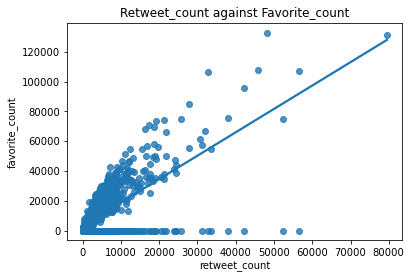

The Correlation between Retweet_count and Favorite_count is 0.7028813596145037


In [250]:
plot_regplot_and_generate_correlation('retweet_count', 'favorite_count', WeRateDogs_master_df )

#### #2. What is the mean favourite_count for all the dog_stages?

In [251]:
mean_favourite_count = WeRateDogs_master_df.groupby('dog_stage')['favorite_count'].mean()
mean_favourite_count

dog_stage
doggo     NaN
floofer   NaN
pupper    NaN
puppo     NaN
Name: favorite_count, dtype: float64

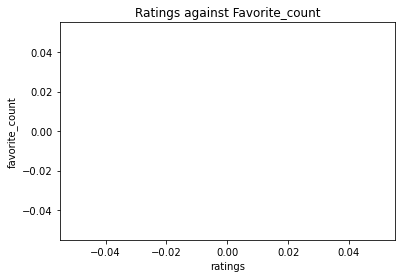

The Correlation between Ratings and Favorite_count is nan


In [252]:
plot_regplot_and_generate_correlation('ratings', 'favorite_count', WeRateDogs_master_df )

In [253]:
#WeRateDogs_master_df['prediction1_confidence', 'prediction2_confidence', 'prediction3_confidence'].describe()

## Insights:
#### 1. The correlation between Retweet_count and Favorite_count is 0.7028813596145037. This is a strong correlation hence the relationship between Retweet_count and Favorite_count is strong. This shows that if a user likes a post on twitter; they will most probably repost it.

#### 2.

#### 3.

## Visualization